# Generating Images

Link to Github Repository for work on GANs: https://github.com/etcho00700/ML_fin_project

# Transfer Learning Models

In [8]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from imutils import paths
import random
from distutils.file_util import copy_file


In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import random
import os
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
from collections import Counter
import tensorflow as tf

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

from keras import Model, layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

## Data Processing/Splitting

In [9]:
data_path = "./COVID-19_Radiography_Dataset"

normal_images_paths = list(paths.list_images(f"{data_path}/Normal"))
covid_images_paths = list(paths.list_images(f"{data_path}/COVID"))
pneumonia_images_paths = list(paths.list_images(f"{data_path}/Viral Pneumonia"))
lung_images_paths = list(paths.list_images(f"{data_path}/Lung_Opacity"))

In [10]:
# Shuffle lists for random train/test
random.shuffle(normal_images_paths)
random.shuffle(covid_images_paths)
random.shuffle(pneumonia_images_paths)
random.shuffle(lung_images_paths)

In [11]:
pathTrain = './Data/Train/'
pathTest = './Data/Test/'
pathVal = './Data/Valid/'

# Move files to new into train/test folders in 80:20 ratio
covid_length = len(covid_images_paths)
covid_train = round(len(covid_images_paths) * 0.6)
covid_test = round(len(covid_images_paths) * 0.8)
normal_length = len(normal_images_paths)
normal_train = round(len(normal_images_paths) * 0.6)
normal_test = round(len(normal_images_paths) * 0.8)
pneumonia_length = len(pneumonia_images_paths)
pneumonia_train = round(len(pneumonia_images_paths) * 0.6)
pneumonia_test = round(len(pneumonia_images_paths) * 0.8)
lung_length = len(lung_images_paths)
lung_train = round(len(lung_images_paths) * 0.6)
lung_test = round(len(lung_images_paths) * 0.8)


# Copy data to from the original dataset to train/test folders
for i in range(covid_length):
    if i < covid_train:
        copy_file(covid_images_paths[i], f"{pathTrain}/COVID")
    elif i < covid_test:
        copy_file(covid_images_paths[i], f"{pathTest}/COVID")
    else :
        copy_file(covid_images_paths[i], f"{pathVal}/COVID")

for i in range(normal_length):
    if i < normal_train:
        copy_file(normal_images_paths[i], f"{pathTrain}/Normal")
    elif i < normal_test:
        copy_file(normal_images_paths[i], f"{pathTest}/Normal")
    else:
        copy_file(normal_images_paths[i], f"{pathVal}/Normal")
        
for i in range(pneumonia_length):
    if i < pneumonia_train:
        copy_file(pneumonia_images_paths[i], f"{pathTrain}/Pneumonia")
    elif i < pneumonia_test:
        copy_file(pneumonia_images_paths[i], f"{pathTest}/Pneumonia")
    else:
        copy_file(pneumonia_images_paths[i], f"{pathVal}/Pneumonia")
        
for i in range(lung_length):
    if i < lung_train:
        copy_file(lung_images_paths[i], f"{pathTrain}/Lung")
    elif i < lung_test:
        copy_file(lung_images_paths[i], f"{pathTest}/Lung")
    else:
        copy_file(lung_images_paths[i], f"{pathVal}/Lung")

In [13]:
root_path = './Data/'
train_pred_test_folders = os.listdir(root_path)[1:]
print(train_pred_test_folders)

['Test', 'Train', 'Valid']


In [154]:
seg_train_folders = './Data/Train/' #one more seg_train folder within
seg_test_folders = './Data/Test/'
seg_pred_folders = './Data/Valid/'
quantity_tr = {} 
quantity_te = {}
quantity_va = {}
for folder in os.listdir(seg_train_folders):
    quantity_tr[folder] = len(os.listdir(seg_train_folders+folder))

for folder in os.listdir(seg_test_folders):
    quantity_te[folder] = len(os.listdir(seg_test_folders+folder))

for folder in os.listdir(seg_pred_folders):
    quantity_va[folder] = len(os.listdir(seg_pred_folders+folder))
    
print(quantity_tr, quantity_te, quantity_va)

{'COVID': 2170, 'Lung': 3607, 'Normal': 6115, 'Pneumonia': 807} {'COVID': 723, 'Lung': 1203, 'Normal': 2039, 'Pneumonia': 269} {'COVID': 723, 'Lung': 1202, 'Normal': 2038, 'Pneumonia': 269}


In [156]:
quantity_train = pd.DataFrame(list(quantity_tr.items()), index=range(0,len(quantity_tr)), columns=['class','count'])
quantity_test = pd.DataFrame(list(quantity_te.items()), index=range(0,len(quantity_te)), columns=['class','count'])
quantity_valid = pd.DataFrame(list(quantity_va.items()), index=range(0,len(quantity_va)), columns=['class','count'])

quantity_train, quantity_test, quantity_valid

(       class  count
 0      COVID   2170
 1       Lung   3607
 2     Normal   6115
 3  Pneumonia    807,
        class  count
 0      COVID    723
 1       Lung   1203
 2     Normal   2039
 3  Pneumonia    269,
        class  count
 0      COVID    723
 1       Lung   1202
 2     Normal   2038
 3  Pneumonia    269)

Number of images in the train set:  12699
Number of images in the test set:  4234
Number of images in the validate set:  4232


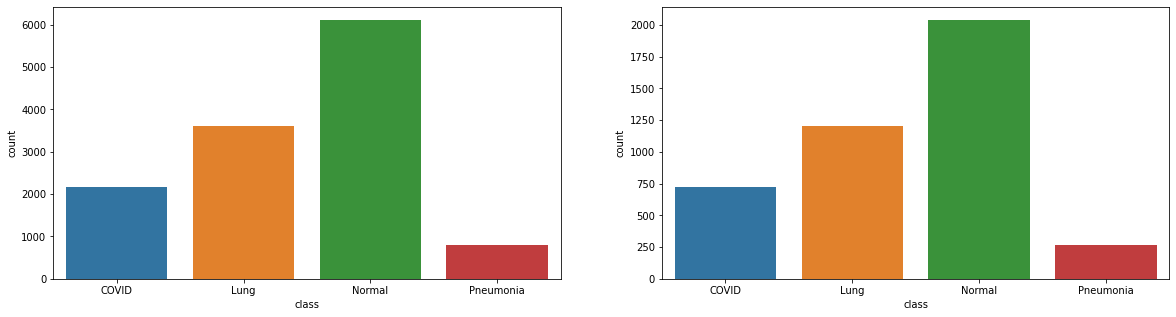

In [158]:
figure, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='class',y='count',data=quantity_train,ax=ax[0])
sns.barplot(x='class',y='count',data=quantity_test,ax=ax[1])

print("Number of images in the train set: ", sum(quantity_tr.values()))
print("Number of images in the test set: ",sum(quantity_te.values()))
print("Number of images in the validate set: ",sum(quantity_va.values()))


plt.show()

In [22]:
def save_history(history, model_name):
    #convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = model_name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # or save to csv: 
    hist_csv_file = model_name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
def plot_accuracy_from_history(history, isinception=False):
    color = sns.color_palette()
    if(isinception == False):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    else:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
    

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label='Training Accuracy')
    sns.lineplot(epochs, val_acc,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.show()
    
def plot_loss_from_history(history):
    color = sns.color_palette()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    sns.lineplot(epochs, loss,label='Training Loss')
    sns.lineplot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()
    plt.show()
    
def do_history_stuff(history, history_file_name, isinception=False):
    save_history(history, history_file_name)
    plot_accuracy_from_history(history, isinception)
    plot_loss_from_history(history)

### Data Generator

In [23]:
ROTATION_DEG = 15
train_datagen = ImageDataGenerator( rescale = 1.0/255.,rotation_range=ROTATION_DEG, fill_mode="nearest")

# we are rescaling by 1.0/255 to normalize the rgb values if they are in range 0-255 the values are too high for good model performance. 
train_generator = train_datagen.flow_from_directory(seg_train_folders,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale = 1.0/255.) #we are only normalising to make the prediction, the other parameters were used for agumentation and train weights
validation_generator = validation_datagen.flow_from_directory(seg_test_folders, shuffle=True, batch_size=1, class_mode='categorical', target_size=(150, 150))

Found 12699 images belonging to 4 classes.
Found 4234 images belonging to 4 classes.


In [24]:
inv_map_classes = {v: k for k, v in validation_generator.class_indices.items()}
print(validation_generator.class_indices)
print(inv_map_classes)

{'COVID': 0, 'Lung': 1, 'Normal': 2, 'Pneumonia': 3}
{0: 'COVID', 1: 'Lung', 2: 'Normal', 3: 'Pneumonia'}


## Training Transfer Models + Benchmark Model

In [44]:
tf.keras.backend.clear_session()

# epoch config
benchmark_epoch = 35
vgg_epoch = 35
resnet_epoch = 35
inception_epoch = 35

### Benchmark Model

In [45]:
#random architecture
benchmark_model = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 150x150 with 3 color channels will be input into this layer
benchmark_model.add(Conv2D(128, kernel_size=7, activation='relu', input_shape=(150,150,3)))
benchmark_model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
benchmark_model.add(Conv2D(64, kernel_size=5, activation='relu'))
benchmark_model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
benchmark_model.add(Flatten())
benchmark_model.add(Dense(128,activation='relu'))
benchmark_model.add(Dense(4,activation='softmax'))

benchmark_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

benchmark_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 128)     18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 67, 67, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8

Epoch 1/35
397/397 [==============================] - ETA: 0s - loss: 0.1690 - acc: 0.9361
Epoch 00001: val_acc improved from -inf to 0.86892, saving model to bench_mark_-model-best.hdf5
397/397 [==============================] - 70s 176ms/step - loss: 0.1690 - acc: 0.9361 - val_loss: 0.4377 - val_acc: 0.8689 - lr: 2.0000e-06
Epoch 2/35
397/397 [==============================] - ETA: 0s - loss: 0.1685 - acc: 0.9376
Epoch 00002: val_acc did not improve from 0.86892
397/397 [==============================] - 69s 173ms/step - loss: 0.1685 - acc: 0.9376 - val_loss: 0.4382 - val_acc: 0.8687 - lr: 2.0000e-06
Epoch 3/35
397/397 [==============================] - ETA: 0s - loss: 0.1670 - acc: 0.9373
Epoch 00003: val_acc did not improve from 0.86892
397/397 [==============================] - 69s 173ms/step - loss: 0.1670 - acc: 0.9373 - val_loss: 0.4380 - val_acc: 0.8689 - lr: 2.0000e-06
Epoch 4/35
397/397 [==============================] - ETA: 0s - loss: 0.1674 - acc: 0.9371
Epoch 00004: val_

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


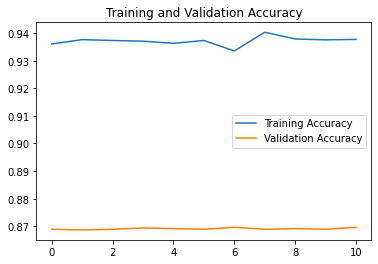

<Figure size 432x288 with 0 Axes>

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


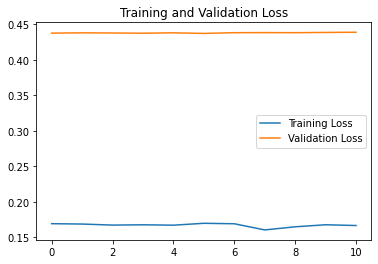

<Figure size 432x288 with 0 Axes>

In [101]:
filepath = "bench_mark_-model-best.hdf5"
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = benchmark_model.fit(train_generator,epochs=benchmark_epoch, verbose=1, validation_data = validation_generator,callbacks=[reduce_lr,early_stopping,checkpoint])

benchmark_model.save(filepath)
do_history_stuff(history, 'benchmark_model')

### VGG16 Model

Epoch 1/35
397/397 [==============================] - ETA: 0s - loss: 0.7788 - acc: 0.6974
Epoch 00001: val_acc improved from -inf to 0.76027, saving model to vgg_16_-saved-model-01-acc-0.76.hdf5
397/397 [==============================] - 84s 205ms/step - loss: 0.7788 - acc: 0.6974 - val_loss: 0.6112 - val_acc: 0.7603
Epoch 2/35
397/397 [==============================] - ETA: 0s - loss: 0.5543 - acc: 0.7948
Epoch 00002: val_acc improved from 0.76027 to 0.79924, saving model to vgg_16_-saved-model-02-acc-0.80.hdf5
397/397 [==============================] - 79s 200ms/step - loss: 0.5543 - acc: 0.7948 - val_loss: 0.5242 - val_acc: 0.7992
Epoch 3/35
397/397 [==============================] - ETA: 0s - loss: 0.5026 - acc: 0.8123
Epoch 00003: val_acc improved from 0.79924 to 0.82286, saving model to vgg_16_-saved-model-03-acc-0.82.hdf5
397/397 [==============================] - 79s 200ms/step - loss: 0.5026 - acc: 0.8123 - val_loss: 0.4825 - val_acc: 0.8229
Epoch 4/35
397/397 [==============

Epoch 30/35
397/397 [==============================] - ETA: 0s - loss: 0.3156 - acc: 0.8813
Epoch 00030: val_acc did not improve from 0.87553
397/397 [==============================] - 79s 200ms/step - loss: 0.3156 - acc: 0.8813 - val_loss: 0.3542 - val_acc: 0.8732
Epoch 31/35
397/397 [==============================] - ETA: 0s - loss: 0.3069 - acc: 0.8876
Epoch 00031: val_acc did not improve from 0.87553
397/397 [==============================] - 79s 199ms/step - loss: 0.3069 - acc: 0.8876 - val_loss: 0.3821 - val_acc: 0.8573
Epoch 32/35
397/397 [==============================] - ETA: 0s - loss: 0.3061 - acc: 0.8854
Epoch 00032: val_acc did not improve from 0.87553
397/397 [==============================] - 79s 200ms/step - loss: 0.3061 - acc: 0.8854 - val_loss: 0.3413 - val_acc: 0.8713
Epoch 33/35
397/397 [==============================] - ETA: 0s - loss: 0.3034 - acc: 0.8856
Epoch 00033: val_acc did not improve from 0.87553
397/397 [==============================] - 79s 198ms/step - 

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


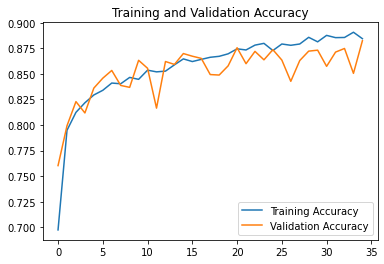

<Figure size 432x288 with 0 Axes>

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


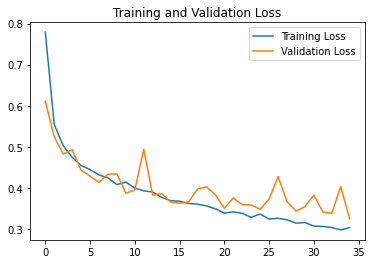

<Figure size 432x288 with 0 Axes>

In [52]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(150,150,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(4, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

# VGG16
number_of_epochs = vgg_epoch
vgg16_filepath = 'vgg_16_'+'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
vgg_checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg16_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
vgg_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
vgg16_history = vgg16_final_model.fit(train_generator, epochs = number_of_epochs ,validation_data = validation_generator,callbacks=[vgg_checkpoint,vgg_early_stopping],verbose=1)

do_history_stuff(vgg16_history, 'vgg16_model')

### ResNet50 Model

C:\Users\pedia\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/35
397/397 [==============================] - ETA: 0s - loss: 0.6174 - acc: 0.8066
Epoch 00001: val_acc improved from -inf to 0.17076, saving model to resnet50-saved-model-01-val_acc-0.17.hdf5


C:\Users\pedia\AppData\Roaming\Python\Python37\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


397/397 [==============================] - 145s 357ms/step - loss: 0.6174 - acc: 0.8066 - val_loss: 1.4990 - val_acc: 0.1708 - lr: 0.0100
Epoch 2/35
397/397 [==============================] - ETA: 0s - loss: 0.2679 - acc: 0.9043
Epoch 00002: val_acc improved from 0.17076 to 0.32333, saving model to resnet50-saved-model-02-val_acc-0.32.hdf5
397/397 [==============================] - 129s 324ms/step - loss: 0.2679 - acc: 0.9043 - val_loss: 2.0934 - val_acc: 0.3233 - lr: 0.0100
Epoch 3/35
397/397 [==============================] - ETA: 0s - loss: 0.1995 - acc: 0.9303
Epoch 00003: val_acc improved from 0.32333 to 0.85616, saving model to resnet50-saved-model-03-val_acc-0.86.hdf5
397/397 [==============================] - 128s 324ms/step - loss: 0.1995 - acc: 0.9303 - val_loss: 0.3918 - val_acc: 0.8562 - lr: 0.0100
Epoch 4/35
397/397 [==============================] - ETA: 0s - loss: 0.1616 - acc: 0.9412
Epoch 00004: val_acc improved from 0.85616 to 0.88829, saving model to resnet50-saved-m

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


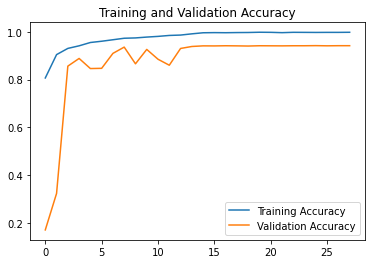

<Figure size 432x288 with 0 Axes>

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


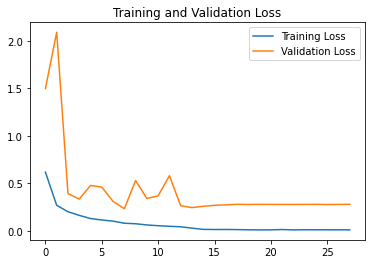

<Figure size 432x288 with 0 Axes>

In [159]:
ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3), classes=4)

for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.01,momentum=0.7)
# resnet50_x = Conv2D(64, (3, 3), activation='relu')(ResNet50_model.output)
# resnet50_x = MaxPooling2D(pool_size=(3, 3))(resnet50_x)
resnet50_x = Flatten()(ResNet50_model.output)
resnet50_x = Dense(256,activation='relu')(resnet50_x)
resnet50_x = Dense(4,activation='softmax')(resnet50_x)
resnet50_x_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_x)
resnet50_x_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = resnet_epoch
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_checkpoint,resnet_early_stopping,reduce_lr]
resnet50_history = resnet50_x_final_model.fit(train_generator, epochs = number_of_epochs ,validation_data = validation_generator,callbacks=callbacklist,verbose=1)

do_history_stuff(resnet50_history, 'resnet50_model')

### InceptionV3 Model

87924736/87910968 [==============================] - 3s 0us/step


C:\Users\pedia\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/35
397/397 [==============================] - 160s 392ms/step - loss: 0.8624 - accuracy: 0.6626 - val_loss: 0.5699 - val_accuracy: 0.7848
Epoch 2/35
397/397 [==============================] - 154s 389ms/step - loss: 0.5863 - accuracy: 0.7767 - val_loss: 0.4910 - val_accuracy: 0.8151
Epoch 3/35
397/397 [==============================] - 152s 384ms/step - loss: 0.5094 - accuracy: 0.8049 - val_loss: 0.4534 - val_accuracy: 0.8318
Epoch 4/35
397/397 [==============================] - 153s 387ms/step - loss: 0.4663 - accuracy: 0.8227 - val_loss: 0.4311 - val_accuracy: 0.8366
Epoch 5/35
397/397 [==============================] - 153s 385ms/step - loss: 0.4298 - accuracy: 0.8383 - val_loss: 0.4187 - val_accuracy: 0.8451
Epoch 6/35
397/397 [==============================] - 154s 388ms/step - loss: 0.4027 - accuracy: 0.8509 - val_loss: 0.4037 - val_accuracy: 0.8519
Epoch 7/35
397/397 [==============================] - 153s 386ms/step - loss: 0.3684 - accuracy: 0.8617 - val_loss: 0.3966 -

Epoch 28/35
397/397 [==============================] - 152s 384ms/step - loss: 0.1448 - accuracy: 0.9480 - val_loss: 0.3941 - val_accuracy: 0.8774
Epoch 29/35
397/397 [==============================] - 152s 382ms/step - loss: 0.1368 - accuracy: 0.9501 - val_loss: 0.3971 - val_accuracy: 0.8803
Epoch 30/35
397/397 [==============================] - 152s 384ms/step - loss: 0.1269 - accuracy: 0.9555 - val_loss: 0.4036 - val_accuracy: 0.8795
Epoch 31/35
397/397 [==============================] - 151s 381ms/step - loss: 0.1216 - accuracy: 0.9562 - val_loss: 0.4027 - val_accuracy: 0.8725
Epoch 32/35
397/397 [==============================] - 152s 384ms/step - loss: 0.1175 - accuracy: 0.9581 - val_loss: 0.4089 - val_accuracy: 0.8720
Epoch 33/35
397/397 [==============================] - 152s 383ms/step - loss: 0.1110 - accuracy: 0.9604 - val_loss: 0.4248 - val_accuracy: 0.8772
Epoch 34/35
397/397 [==============================] - 153s 386ms/step - loss: 0.1077 - accuracy: 0.9628 - val_loss: 0

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


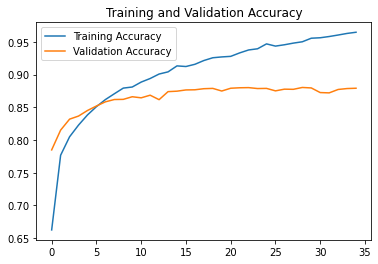

<Figure size 432x288 with 0 Axes>

c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pedia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


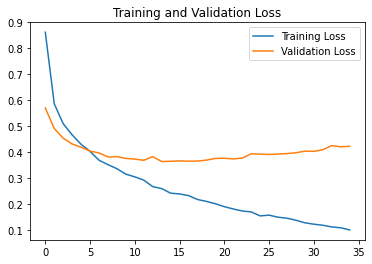

<Figure size 432x288 with 0 Axes>

In [51]:
# this could also be the output a different Keras model or layer

InceptionV3_model = InceptionV3(input_shape=(150,150,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
    layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
    layer.trainable = True
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = Dropout(0.5)(InceptionV3_x)
InceptionV3_x = Dense(4, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs = inception_epoch
inception_filepath = 'inceptionv3_'+'-saved-model-{epoch:02d}-loss-{loss:.2f}.hdf5'
inception_checkpoint = tf.keras.callbacks.ModelCheckpoint(inception_filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = number_of_epochs, validation_data = validation_generator,callbacks=[inception_checkpoint,inception_early_stopping],verbose=1)

do_history_stuff(inceptionv3_history, 'inceptionv3_model', True)  

## Model Analysis + Results

In [53]:
# Best Models
vgg_best_model = vgg16_final_model 
resnet_best_model = resnet50_x_final_model
inception_best_model = InceptionV3_x_final_model 

In [102]:
# Mode function used for combined model voting
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

In [103]:
from sklearn.metrics import confusion_matrix
import itertools

# Confusion matrix + Other Result Stats
def clf_report(true_value, model_pred):
    
    classes = validation_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))] #Correct Labels
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [190]:
# This function will randomly pick a few examples and output the true label, the image itself, and the model prediction
def show_few_images(number_of_examples=2, predict_using_model=None):
    figure1, ax1 = plt.subplots(number_of_examples,len(os.listdir(seg_pred_folders)), figsize=(20,4*number_of_examples))
    ax1 = ax1.reshape(-1)
    axoff_fun = np.vectorize(lambda ax:ax.axis('off'))
    axoff_fun(ax1)
    axs = 0
    cursum = 0
    for i, folder in enumerate(os.listdir(seg_pred_folders)):
        image_ids = os.listdir(os.path.join(seg_pred_folders,folder))
        for j in [random.randrange(0, len(image_ids)) for i in range(0,number_of_examples)]:
            display = plt.imread(os.path.join(seg_pred_folders,folder,image_ids[j]))
            plt.axis('off')
            ax1[axs].imshow(display)
            title = 'True:'+folder
            if(predict_using_model):
                predicted_classname = inv_map_classes[predict_using_model[j+cursum]]
                title = title+'\nPredict :'+predicted_classname
            ax1[axs].set_title(title)
            axs=axs+1
        cursum += len(image_ids)

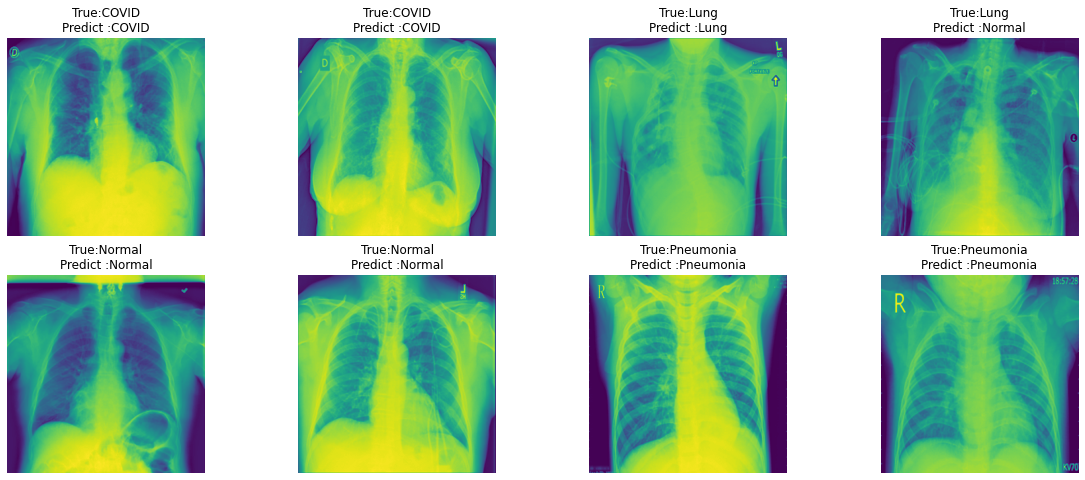

In [196]:
show_few_images(2,benchmark_model_pred)

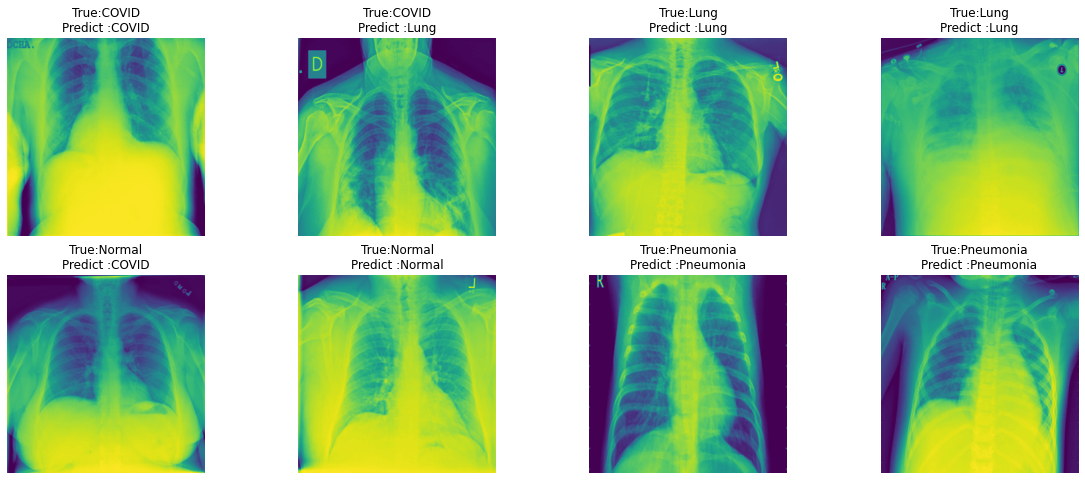

In [195]:
show_few_images(2,vgg_pred)

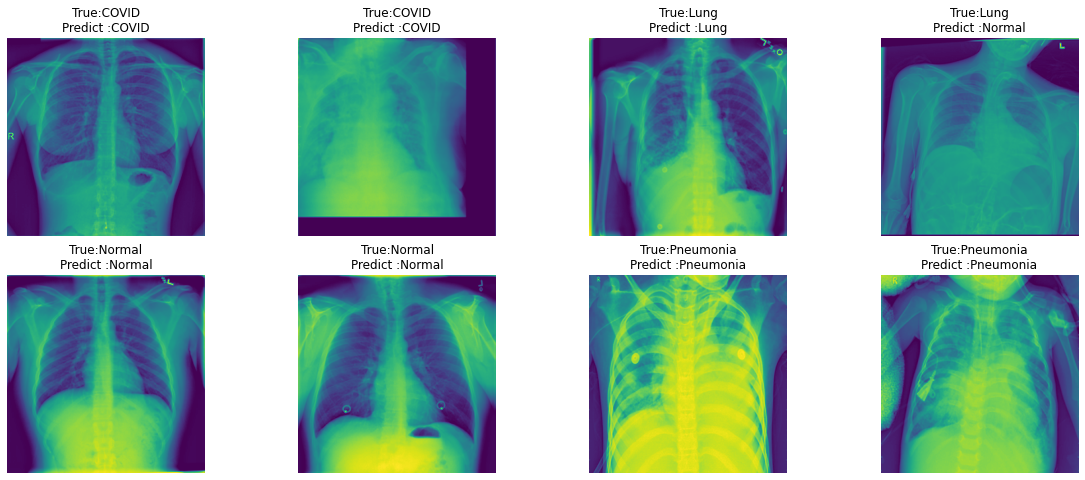

In [192]:
show_few_images(2,resnet_pred_validate)

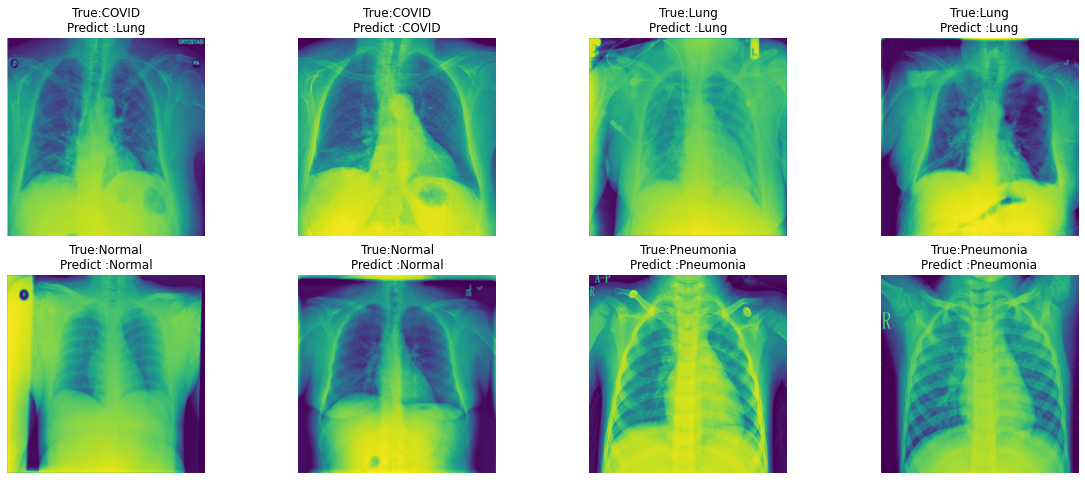

In [193]:
show_few_images(2,inception_pred)

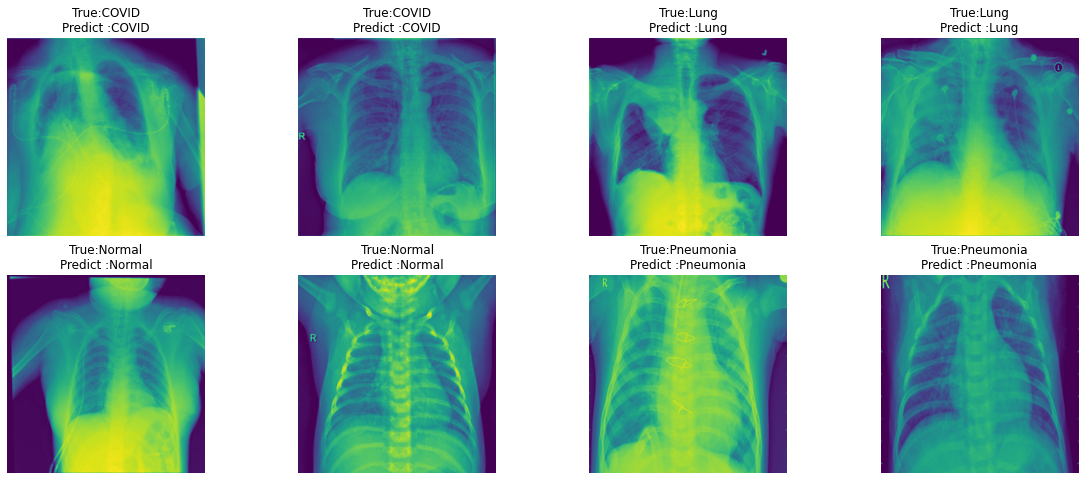

In [194]:
show_few_images(2,combined_model_pred)

## Run Models on Validation set to get the accuracy we should report

In [198]:
#New Combined using class probabilities
true_value_validate = []
combined_model_pred_validate = []
combined_pred_probs = []
vgg_pred_validate = []
vgg_pred_probs = []
resnet_pred_validate = []
resnet_pred_probs = []
inception_pred_validate = []
inception_pred_probs = []
benchmark_model_pred_validate = []
benchmark_pred_probs = []
for folder in os.listdir(seg_pred_folders):
    test_image_ids = os.listdir(os.path.join(seg_pred_folders,folder))
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(seg_pred_folders,folder,image_id)
        
        true_value_validate.append(validation_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(150,150))
        img_normalized = img/255
        #vgg
        vgg16_image_pred_probs = vgg_best_model.predict(np.array([img_normalized]))
        vgg16_image_prediction = np.argmax(vgg16_image_pred_probs)
        vgg_pred_validate.append(vgg16_image_prediction)
        vgg_pred_probs.append(vgg16_image_pred_probs)
        
        #resnet50
        resnet_image_pred_probs = resnet_best_model.predict(np.array([img_normalized]))
        resnet_50_image_prediction = np.argmax(resnet_image_pred_probs)
        resnet_pred_validate.append(resnet_50_image_prediction)
        resnet_pred_probs.append(resnet_image_pred_probs)
        
        #Inception
        inception_image_pred_probs = inception_best_model.predict(np.array([img_normalized]))
        inception_image_prediction = np.argmax(inception_image_pred_probs)
        inception_pred_validate.append(inception_image_prediction)
        inception_pred_probs.append(inception_image_pred_probs)
        
        #benchmark
        benchmark_image_pred_probs = benchmark_model.predict(np.array([img_normalized]))
        benchmark_model_prediction = np.argmax(benchmark_image_pred_probs)
        benchmark_model_pred_validate.append(benchmark_model_prediction)
        benchmark_pred_probs.append(benchmark_image_pred_probs)
        
        combined_image_prediction = mode([resnet_50_image_prediction, vgg16_image_prediction, inception_image_prediction])
        combined_model_pred_validate.append(combined_image_prediction)

Model Accuracy 0.8716918714555766
              precision    recall  f1-score   support

       COVID       0.88      0.89      0.89       723
        Lung       0.84      0.80      0.82      1202
      Normal       0.88      0.90      0.89      2038
   Pneumonia       0.93      0.92      0.92       269

    accuracy                           0.87      4232
   macro avg       0.88      0.88      0.88      4232
weighted avg       0.87      0.87      0.87      4232



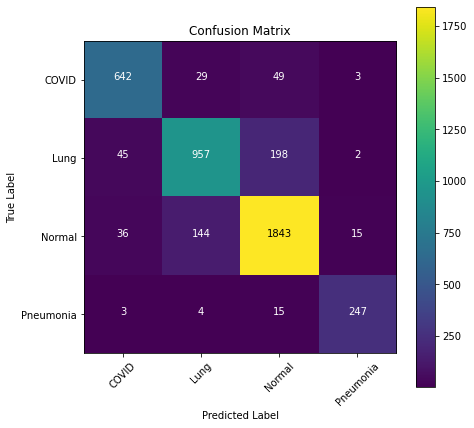

In [199]:
# Benchmark Model Results
clf_report(true_value_validate, benchmark_model_pred_validate)

Model Accuracy 0.9248582230623819
              precision    recall  f1-score   support

       COVID       0.95      0.94      0.94       723
        Lung       0.92      0.86      0.89      1202
      Normal       0.91      0.95      0.93      2038
   Pneumonia       0.99      0.96      0.97       269

    accuracy                           0.92      4232
   macro avg       0.94      0.93      0.93      4232
weighted avg       0.93      0.92      0.92      4232



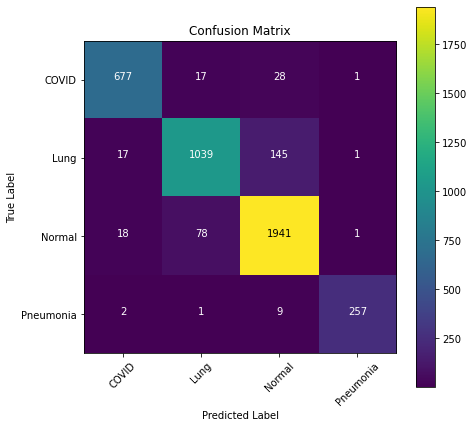

In [200]:
# Combined Model (Voting) Results
combined_model_pred_validate = [ c[0] for c in combined_model_pred_validate]
clf_report(true_value_validate, combined_model_pred_validate)

Model Accuracy 0.8709829867674859
              precision    recall  f1-score   support

       COVID       0.85      0.83      0.84       723
        Lung       0.84      0.81      0.83      1202
      Normal       0.88      0.92      0.90      2038
   Pneumonia       0.97      0.91      0.94       269

    accuracy                           0.87      4232
   macro avg       0.89      0.87      0.88      4232
weighted avg       0.87      0.87      0.87      4232



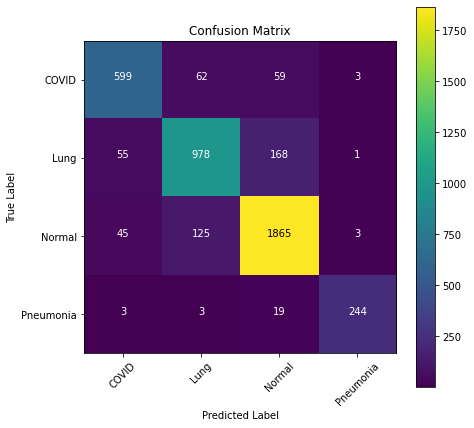

In [201]:
# VGG16 Model Results
clf_report(true_value_validate, vgg_pred_validate)

Model Accuracy 0.9397448015122873
              precision    recall  f1-score   support

       COVID       0.97      0.97      0.97       723
        Lung       0.93      0.87      0.90      1202
      Normal       0.93      0.96      0.94      2038
   Pneumonia       0.99      0.98      0.98       269

    accuracy                           0.94      4232
   macro avg       0.95      0.95      0.95      4232
weighted avg       0.94      0.94      0.94      4232



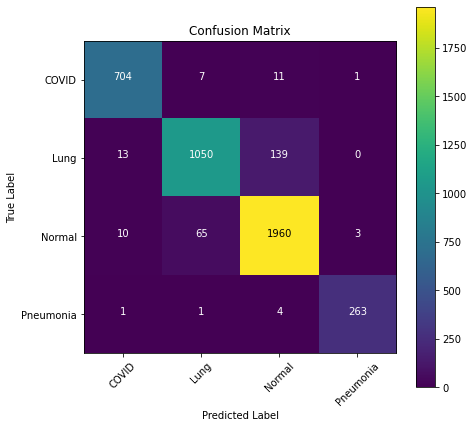

In [202]:
# ResNet50 Model Results
clf_report(true_value_validate, resnet_pred_validate)

Model Accuracy 0.875945179584121
              precision    recall  f1-score   support

       COVID       0.84      0.83      0.84       723
        Lung       0.86      0.82      0.84      1202
      Normal       0.89      0.92      0.90      2038
   Pneumonia       0.97      0.93      0.95       269

    accuracy                           0.88      4232
   macro avg       0.89      0.87      0.88      4232
weighted avg       0.88      0.88      0.88      4232



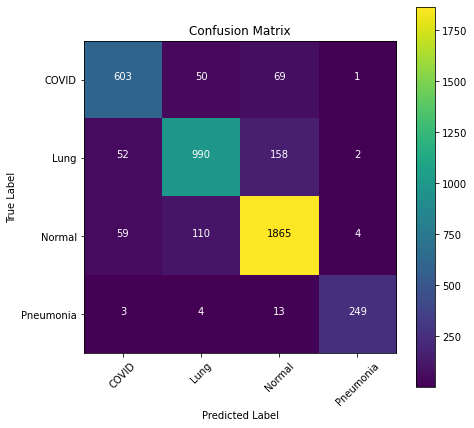

In [203]:
# InceptionV3 Model Results
clf_report(true_value_validate, inception_pred_validate)

Model Accuracy 0.9248582230623819
              precision    recall  f1-score   support

       COVID       0.95      0.94      0.94       723
        Lung       0.92      0.86      0.89      1202
      Normal       0.91      0.95      0.93      2038
   Pneumonia       0.99      0.96      0.97       269

    accuracy                           0.92      4232
   macro avg       0.94      0.93      0.93      4232
weighted avg       0.93      0.92      0.92      4232



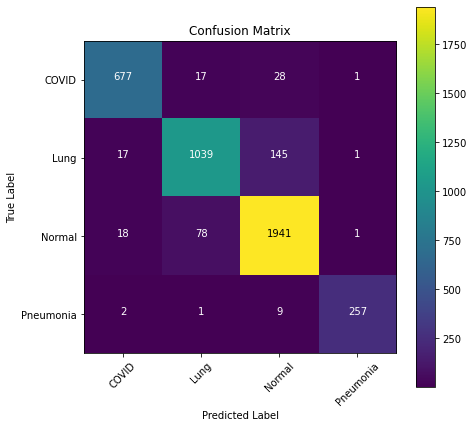

In [204]:
#New Combined
clf_report(true_value_validate, combined_model_pred_validate)

In [205]:
combined_probs = np.array(inception_pred_probs) + np.array(resnet_pred_probs) + np.array(vgg_pred_probs)
combined_weighted_probs = .9 * np.array(inception_pred_probs) + 1.25 * np.array(resnet_pred_probs) + .9 * np.array(vgg_pred_probs)

Model Accuracy 0.9295841209829868
              precision    recall  f1-score   support

       COVID       0.96      0.94      0.95       723
        Lung       0.92      0.87      0.89      1202
      Normal       0.92      0.96      0.94      2038
   Pneumonia       0.99      0.96      0.97       269

    accuracy                           0.93      4232
   macro avg       0.95      0.93      0.94      4232
weighted avg       0.93      0.93      0.93      4232



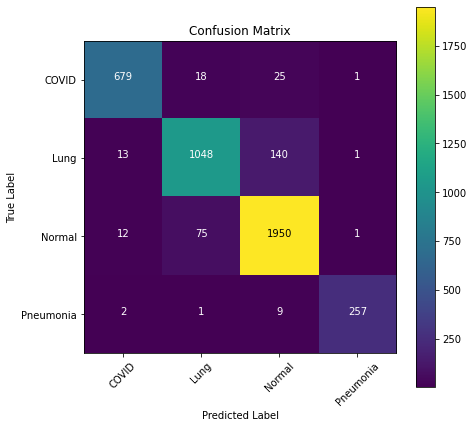

In [206]:
# Combined Additive Probabilities Model Results
combined_preds = np.argmax(combined_probs, axis=2)
combined_model_preds = [ c[0] for c in combined_preds]
clf_report(true_value_validate, combined_model_preds)

Model Accuracy 0.933601134215501
              precision    recall  f1-score   support

       COVID       0.97      0.95      0.96       723
        Lung       0.92      0.87      0.90      1202
      Normal       0.92      0.96      0.94      2038
   Pneumonia       0.99      0.97      0.98       269

    accuracy                           0.93      4232
   macro avg       0.95      0.94      0.94      4232
weighted avg       0.93      0.93      0.93      4232



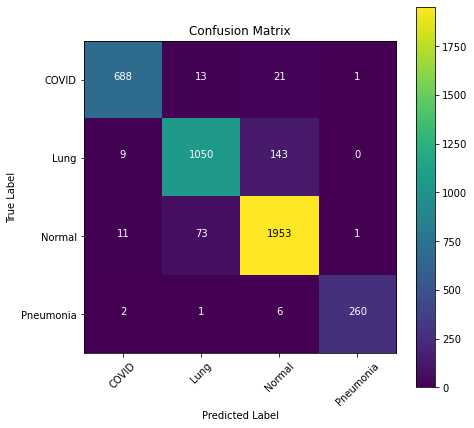

In [207]:
# Combined Weighted Probabilities Model Results
combined_weighted_preds = np.argmax(combined_weighted_probs, axis=2)
combined_model_weighted = [ c[0] for c in combined_weighted_preds]
clf_report(true_value_validate, combined_model_weighted)